In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_gas_train = pd.read_csv('Geochemistry Data/CNS_gas_train.csv').reset_index(drop=True)
gas_train_cols_desc = df_gas_train.loc[0].values.tolist()
df_gas_train = df_gas_train[1:].reset_index(drop=True)
df_gas_train.head().T

,0,1,2,3,4
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
WELL_NAME,023/22A-A12 (A12),023/22A-A12 (A12),023/22A-A12 (A12),023/22A-A12 (A12),023/22A-A12 (A12)
OGA Well Name,23/22a-A12,23/22a-A12,23/22a-A12,23/22a-A12,23/22a-A12
WH_SITETYPE,WELL,WELL,WELL,WELL,WELL
WH_FIELD,PIERCE,PIERCE,PIERCE,PIERCE,PIERCE
WH_BLOCK,023/22a,023/22a,023/22a,023/22a,023/22a
WH_LAT,NaN,NaN,NaN,NaN,NaN
WH_LONG,NaN,NaN,NaN,NaN,NaN
WH_COORD_SYS,NaN,NaN,NaN,NaN,NaN
WH_OPERATOR,SHELL,SHELL,SHELL,SHELL,SHELL


In [3]:
df_gas_train.shape

(1709, 91)

# df_gas_train

In [190]:
TARGET_COLS = ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']

gas_f = ['GAS_C1',
         'GAS_C2',
         'C2_UNSAT',
         'GAS_C3',
         'C3_UNSAT',
         'GAS_IC4',
         'GAS_NC4',
         'C4_UNSAT',
         'GAS_NEOC5',
         'GAS_IC5',
         'GAS_NC5',
         'C5_UNSAT',
         'GAS_NC5_PLUS',
         'GAS_C6PLUS',
         'GAS_O2',
         'GAS_CO2']

In [5]:
dict(zip(df_gas_train.columns.values.tolist(), gas_train_cols_desc))

{'Country': nan,
 'WELL_NAME': 'Well name',
 'OGA Well Name': 'Well name',
 'WH_SITETYPE': 'Site type',
 'WH_FIELD': 'Field name',
 'WH_BLOCK': 'Block name',
 'WH_LAT': 'Latitude',
 'WH_LONG': 'Longitude',
 'WH_COORD_SYS': 'Location CRS',
 'WH_OPERATOR': 'Operator',
 'WH_SPUD_DATE': 'Spud date',
 'WH_SPUD_YEAR': 'Spud year',
 'WH_COMP_DATE': 'Completion date',
 'WH_TD_M': 'Target depth (m)',
 'WH_DR_ELEV_M': 'Derrick floor elevation (m)',
 'WH_DEPTH_REF': 'Depth reference',
 'WH_WATER_DEPTH_M': 'Water depth (m)',
 'SAMPLE_ID': 'Sample code',
 'SH_DEPTH_TOP_FT': 'Top depth in feet',
 'SH_DEPTH_BOT_FT': 'Base depth in feet',
 'SH_SAMPLE_TYPE': 'Sample type',
 'SH_SAMPLE_SUB_TYPE': 'Sample origin/sub-type',
 'SH_ORIG': 'Sample origin',
 'SH_ORIG_DESC': 'Sample origin description',
 'SH_TREATMENT': 'Sample treatment',
 'SH_TREATMENT_DESC': 'Sample treatment description',
 'SH_LITH': 'Sample lithology',
 'SH_AGE': 'Sample age (top)',
 'SH_AGE_BOT': 'Sample age (bottom)',
 'SH_FORM': 'Format

In [6]:
for col in df_gas_train.columns:
    print(col)
    print(df_gas_train[col].unique())

Country
['United Kingdom']
WELL_NAME
['023/22A-A12 (A12)' '030/07a-09' '030/07A-11S1' '030/06-03' '030/19a-04'
 '030/17a-10' '030/16-07' '030/14-01' '029/09B-09' '029/09a-01'
 '029/08a-04' '029/07-05' '029/07-04' '029/07-13 (CUC P1)'
 '029/07-11 (CUD P3)' '029/05b-06' '029/05a-07' '029/05a-03' '029/03C-08Z'
 '029/03A-07' '029/03A-06' '029/01B-B1 (BITTERN B1)'
 '029/01A-A3 (BITTERN A3)' '029/10-03' '029/10-02' '023/27-B5' '023/27-B2'
 '023/27A-A10' '023/27-10Z(PIERCE-B1)' '023/22A-C1Z' '023/22A-A9'
 '023/22A-A7Z' '023/22A-A6' '023/22A-A5' '023/22A-A3X' '023/22A-A2Y'
 '023/22A-A11Z' '023/22A-A1' '023/16b-09' '023/16B-01' '022/07-03'
 '022/06A-09' '022/30B-A09 (SW A6)' '022/30B-A07(SW-A8S1)'
 '022/30B-A06 (SW A5)' '022/30B-A05 (SW A7)' '022/30B-A4(SW A1)'
 '022/30B-A3(SW A9)' '022/30B-A2(SW A4)' '22/30B-A16 (SW5S2)'
 '22/30B-A15 (SW4S1)' '22/30B-A14 (SW7S1)' '22/30B-A13Z (SW A6S2)'
 '22/30B-A13 (SW A6S1)' '22/30B-A12 (SW1S1)' '22/30B-A11Z (SW9S2)'
 '22/30B-A11Y (SW9S3)' '22/30B-A11 (SW9S1

In [7]:
for col in ['SH_FORM']:
    print(col)
    df_gas_train[col] = df_gas_train[col].str.upper()
    print('Done!')

SH_FORM
Done!


In [8]:
for col in TARGET_COLS:
    print(col)
    df_gas_train[col] = df_gas_train[col].astype(float)
    print(df_gas_train[col].unique(), len(df_gas_train[col]))

GAS_C1
[ 75.5     75.4     99.8     99.4     99.      97.8     95.8     94.8
  92.4     89.8     90.      85.1     85.9     85.8     85.4     87.
  85.3     86.9     72.3     86.1     86.7     87.7     77.7     89.3
  91.5     80.7     78.88    84.69    83.66    79.      79.86    65.55
  54.84    74.21    74.81    70.6     83.55    54.57    67.1     67.4
  66.4     82.      83.      80.      78.      84.      55.      75.
  70.5     75.56    85.52    83.98    82.7     82.72    92.9     91.1
  91.4     91.8     90.1     86.6     90.3     89.4     77.1     72.9
  72.8     91.      86.      88.      92.      93.      94.      82.8
  98.1     99.2     80.9     79.9     90.6     78.8     83.7     87.9
  86.5     89.9     88.4     89.5     89.1     91.2     86.4     81.6
  79.5     69.1     55.6     87.8     87.2     83.3     77.9     81.2
  81.      88.5     94.1     98.8     99.7     73.5     73.7     82.9
  96.4     68.9     72.      74.5     76.5     79.3     78.1     71.8
  79.1     71.

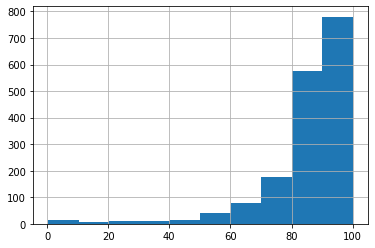

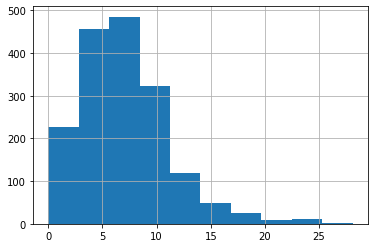

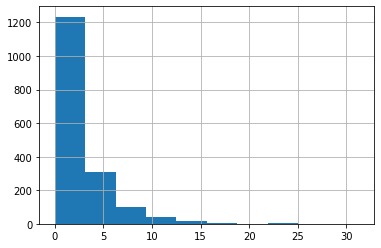

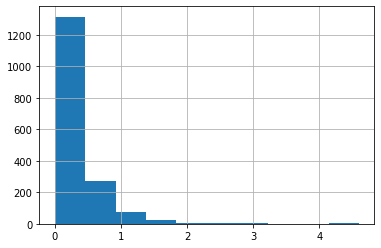

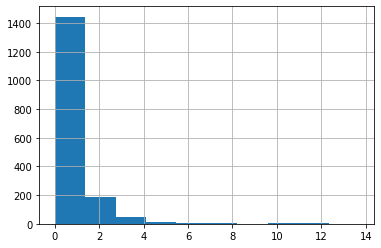

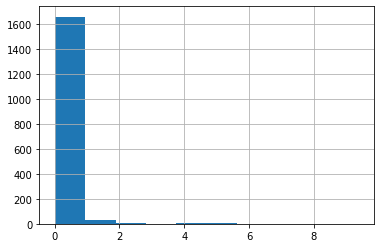

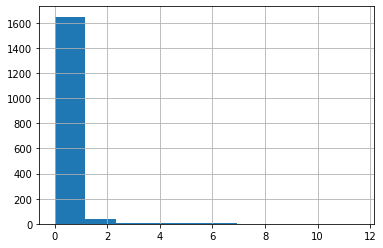

In [9]:
%matplotlib inline
for col in TARGET_COLS:
    df_gas_train[col].hist()
    plt.show()

In [10]:
coord_cols = [col for col in df_gas_train.columns if 'DEPTH_REF' not in col and ('DEPTH' in col or 'LAT' in col or 'LONG' in col)]
df_gas_train[coord_cols].T.head()

,0,1,2,3,4,5,6,7,8,9,...,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708
WH_LAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.00064389,58.0005711,58.02438681,58.02438681,58.06368812,58.03685295,58.03685295,58.01942425,58.36753631,58.17926198
WH_LONG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.221581456,-0.362830362,-0.367890222,-0.367890222,-0.820298306,World Geodetic System 1984,-0.891146243,-0.912446013,-0.081898178,-1.460759073
WH_WATER_DEPTH_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
SH_DEPTH_TOP_FT,9814,9814,5400,6600,7300,8100,9126,9600,9710,9750,...,8890,9730,8406,8406,6412,6542,6542,6458,9447.01,7814.99
SH_DEPTH_BOT_FT,12360,12360,5400,6600,7300,8100,9126,9600,9710,9750,...,8890,9760,8406,8406,6498,6542,6542,6508,9464.01,7856.99


In [11]:
coord_cols

['WH_LAT', 'WH_LONG', 'WH_WATER_DEPTH_M', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT']

In [12]:
df_gas_train['block'] = df_gas_train['WH_BLOCK'].str.extract('(\d\d\/\d\d\w?)')
df_gas_train['block'] = df_gas_train['block'].str.lower()

In [13]:
df_production = pd.read_csv('Production Data/CNS_Field_Production.csv')
df_production.head().T

,0,1,2,3,4
X,1.11456,1.11456,1.11456,1.11456,1.11456
Y,58.2314,58.2314,58.2314,58.2314,58.2314
OBJECTID,3001,3002,3003,3004,3005
FIELDNAME,BALMORAL,BALMORAL,BALMORAL,BALMORAL,BALMORAL
FIELDAREA,CNS,CNS,CNS,CNS,CNS
ORGGRPNM,PREMIER OIL PLC,PREMIER OIL PLC,PREMIER OIL PLC,PREMIER OIL PLC,PREMIER OIL PLC
UNITNAME,BALMORAL,BALMORAL,BALMORAL,BALMORAL,BALMORAL
UNITTYPCOD,P,P,P,P,P
UNITTYPDES,Oil Field Exporting to Pipeline,Oil Field Exporting to Pipeline,Oil Field Exporting to Pipeline,Oil Field Exporting to Pipeline,Oil Field Exporting to Pipeline
LOCATION,Offshore,Offshore,Offshore,Offshore,Offshore


In [14]:
df_production['block'] = df_production['WELLREGNO'].str.extract('(\d\d\/\d\d\w?)')
df_production['block'] = df_production['block'].str.lower()

In [15]:
set_1 = set(df_gas_train['block'])
set_2 = set(df_production['block'])
len(set_1), len(set_2), len(set_1.intersection(set_2)), len(set_1 - set_2), len(set_2 - set_1), len(set_1.symmetric_difference(set_2))

(78, 1122, 62, 16, 1060, 1076)

In [16]:
df_rock = pd.read_csv('Geochemistry Data/CNS rock samples.csv')
gas_train_cols_desc = df_rock.loc[0].values.tolist()
df_rock = df_rock[1:].reset_index(drop=True)
df_rock.head().T

/home/i.migal/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
WELL_NAME,014/19-27S1,014/19-27S1,014/19-27S1,014/19-27S1,014/19-27S1
OGA Well Name,14/19- 27Z,14/19- 27Z,14/19- 27Z,14/19- 27Z,14/19- 27Z
WH_SITETYPE,WELL,WELL,WELL,WELL,WELL
WH_FIELD,NaN,NaN,NaN,NaN,NaN
WH_BLOCK,014/19,014/19,014/19,014/19,014/19
WH_LAT,NaN,NaN,NaN,NaN,NaN
WH_LONG,NaN,NaN,NaN,NaN,NaN
WH_COORD_SYS,NaN,NaN,NaN,NaN,NaN
WH_OPERATOR,NaN,NaN,NaN,NaN,NaN


In [17]:
PROTO_TARGET_PROD_COLS = [
    'OILPRODMAS',
    'OILPRODM3',
    'OILPRDDENS',
    'OILPRODMBD',
    'WATPRODMAS',
    'WATPRODVOL',
    'WATPRODMBD',
    'AGASPRODMA',
    'AGASPROMMS',
    'AGASPROKSM',
    'AGASPRODEN',
]

In [199]:
df_production['PERIODDATE_dt'] = pd.to_datetime(df_production['PERIODDATE'])
df_production['date'] = pd.to_datetime(df_production['PERIODDATE_dt'].dt.strftime('%Y-%m'))
df_prod_groupby = df_production.groupby(['block', 'date'])[PROTO_TARGET_PROD_COLS].median().reset_index()
# df_prod_groupby['block_dt'] = df_prod_groupby['block'] + '_' + df_prod_groupby['date'].dt.strftime('%Y_%m')

In [218]:
df_prod_groupby

,block,date,OILPRODMAS,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
0,02/02,2005-08-01,9929.98600,12199.0,814.0,2.475216,33194.0,33194.0,6.735170,965.94000,1.078816,947.00000,1.020
1,02/03,1994-03-01,64813.99770,78591.0,825.0,15.946367,248235.0,248235.0,50.367682,9097.83600,6.001272,5268.00000,1.727
2,02/03,1994-04-01,71800.85610,87063.0,825.0,18.254209,272358.0,272358.0,57.104394,10006.23800,6.820504,5794.00000,1.727
3,02/03,2007-04-01,20206.46000,25385.0,796.0,5.322388,54513.0,54513.0,11.429559,6908.00000,10.164834,8635.00000,0.800
4,02/03a,1994-05-01,72716.27310,88173.0,825.0,17.890586,280498.0,280498.0,56.913949,10056.32100,6.633524,5823.00000,1.727
5,02/04,2005-09-01,8083.83400,9931.0,814.0,2.082200,24886.0,24886.0,5.217765,795.60000,0.918190,780.00000,1.020
6,02/08,2005-10-01,8780.61800,10787.0,814.0,2.188717,23591.0,23591.0,4.786690,860.88000,0.961479,844.00000,1.020
7,02/09,2005-11-01,8475.36800,10412.0,814.0,2.183049,23726.0,23726.0,4.974551,820.08000,0.946442,804.00000,1.020
8,02/12,2005-12-01,9037.02800,11102.0,814.0,2.252632,26837.0,26837.0,5.445314,867.00000,0.968315,850.00000,1.020
9,02/18,2006-01-01,2987.38000,3670.0,814.0,0.744655,9792.0,9792.0,1.986828,289.68000,0.323531,284.00000,1.020


In [260]:
for col in gas_f:
    df_gas_train[col] = df_gas_train[col].astype(float)
    print(df_gas_train[col].unique())

[ 75.5     75.4     99.8     99.4     99.      97.8     95.8     94.8
  92.4     89.8     90.      85.1     85.9     85.8     85.4     87.
  85.3     86.9     72.3     86.1     86.7     87.7     77.7     89.3
  91.5     80.7     78.88    84.69    83.66    79.      79.86    65.55
  54.84    74.21    74.81    70.6     83.55    54.57    67.1     67.4
  66.4     82.      83.      80.      78.      84.      55.      75.
  70.5     75.56    85.52    83.98    82.7     82.72    92.9     91.1
  91.4     91.8     90.1     86.6     90.3     89.4     77.1     72.9
  72.8     91.      86.      88.      92.      93.      94.      82.8
  98.1     99.2     80.9     79.9     90.6     78.8     83.7     87.9
  86.5     89.9     88.4     89.5     89.1     91.2     86.4     81.6
  79.5     69.1     55.6     87.8     87.2     83.3     77.9     81.2
  81.      88.5     94.1     98.8     99.7     73.5     73.7     82.9
  96.4     68.9     72.      74.5     76.5     79.3     78.1     71.8
  79.1     71.3     6

In [299]:
df_gas_train['WH_LONG'] = df_gas_train['WH_LONG'].replace({"World Geodetic System 1984":"nan"}).astype(float)
df_gas_train['WH_LAT'] = df_gas_train['WH_LAT'].replace({"World Geodetic System 1984":"nan"}).astype(float)

In [300]:
df_gas_train['SH_CDATE_dt'] = pd.to_datetime(df_gas_train['SH_CDATE'])
df_gas_train['date'] = pd.to_datetime(df_gas_train['SH_CDATE_dt'].dt.strftime('%Y-%m'))
df_gas_groupby = df_gas_train.groupby(['block', 'date'])[gas_f + ['WH_LONG', 'WH_LAT']].median().reset_index()
# df_gas_groupby['block_dt'] = df_gas_groupby['block'] + '_' + df_gas_groupby['date'].dt.strftime('%Y_%m')

In [301]:
#df_gas_groupby = df_gas_groupby.dropna(how='all', axis=1)
df_gas_groupby

,block,date,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2,WH_LONG,WH_LAT
0,14/29a,2003-06-01,87.20,6.8000,NaN,2.70000,NaN,0.38000,0.79000,NaN,NaN,0.18000,0.2400,NaN,NaN,0.3100,NaN,0.410,-0.381319,58.001916
1,14/29a,2004-11-01,84.10,6.9000,NaN,2.90000,NaN,0.42000,0.97000,NaN,0.00300,0.22000,0.2900,NaN,NaN,0.3400,NaN,0.370,-0.381382,58.001917
2,21/20a,2012-10-01,73.90,11.2000,NaN,6.00000,NaN,0.61000,1.90000,NaN,0.00180,0.38000,0.5700,NaN,NaN,0.6100,NaN,0.024,0.820327,57.363448
3,21/20b,2012-01-01,87.60,8.7000,0.00830,2.50000,0.00300,0.18000,0.61000,NaN,NaN,0.11000,0.2000,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
4,21/20b,2012-06-01,99.90,0.0740,0.00040,0.01700,0.00030,0.00270,0.00240,NaN,NaN,0.00170,0.0017,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
5,21/20b,2012-07-01,86.20,8.6000,0.08050,3.30000,0.05150,0.28500,0.93500,NaN,NaN,0.16500,0.3200,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
6,21/20b,2012-08-01,50.90,22.5000,0.01500,15.85000,0.02400,1.52500,6.05000,NaN,NaN,1.04500,2.0400,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
7,21/20b,2012-09-01,80.10,13.2000,0.00470,4.90000,0.00320,0.35000,1.20000,NaN,NaN,0.18000,0.3200,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
8,21/20b,2012-10-01,95.20,2.8000,0.85000,0.60000,0.38000,0.04100,0.08800,NaN,NaN,0.01300,0.0320,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027
9,21/20b,2012-11-01,81.40,9.7000,0.36000,4.00000,0.15000,0.26000,0.91000,NaN,NaN,0.12000,0.2500,NaN,NaN,NaN,NaN,NaN,0.921278,57.386027


In [302]:
df_prod_groupby.rename({'dt_month_ceil': 'date'}, axis=1, inplace=True)
df_gas_groupby.rename({'dt_month_ceil': 'date'}, axis=1, inplace=True)

In [303]:
# set_1 = set(df_gas_groupby['block_dt'])
# set_2 = set(df_prod_groupby['block_dt'])
# len(set_1), len(set_2), len(set_1.intersection(set_2)), len(set_1 - set_2), len(set_2 - set_1), len(set_1.symmetric_difference(set_2))

In [304]:
df_master = df_gas_groupby.merge(df_prod_groupby, on=['block', 'date'], how='left')
df_master = df_master.sort_values(['block', 'date']).reset_index(drop=True)
df_master

,block,date,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,...,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
0,14/29a,2003-06-01,87.20,6.8000,NaN,2.70000,NaN,0.38000,0.79000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14/29a,2004-11-01,84.10,6.9000,NaN,2.90000,NaN,0.42000,0.97000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21/20a,2012-10-01,73.90,11.2000,NaN,6.00000,NaN,0.61000,1.90000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21/20b,2012-01-01,87.60,8.7000,0.00830,2.50000,0.00300,0.18000,0.61000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21/20b,2012-06-01,99.90,0.0740,0.00040,0.01700,0.00030,0.00270,0.00240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21/20b,2012-07-01,86.20,8.6000,0.08050,3.30000,0.05150,0.28500,0.93500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21/20b,2012-08-01,50.90,22.5000,0.01500,15.85000,0.02400,1.52500,6.05000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21/20b,2012-09-01,80.10,13.2000,0.00470,4.90000,0.00320,0.35000,1.20000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21/20b,2012-10-01,95.20,2.8000,0.85000,0.60000,0.38000,0.04100,0.08800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21/20b,2012-11-01,81.40,9.7000,0.36000,4.00000,0.15000,0.26000,0.91000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
df_master.columns

Index(['block', 'date', 'GAS_C1', 'GAS_C2', 'C2_UNSAT', 'GAS_C3', 'C3_UNSAT',
       'GAS_IC4', 'GAS_NC4', 'C4_UNSAT', 'GAS_NEOC5', 'GAS_IC5', 'GAS_NC5',
       'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_C6PLUS', 'GAS_O2', 'GAS_CO2',
       'WH_LONG', 'WH_LAT', 'OILPRODMAS', 'OILPRODM3', 'OILPRDDENS',
       'OILPRODMBD', 'WATPRODMAS', 'WATPRODVOL', 'WATPRODMBD', 'AGASPRODMA',
       'AGASPROMMS', 'AGASPROKSM', 'AGASPRODEN'],
      dtype='object')

In [142]:
df_gas_train['date'] = df_gas_train['SH_CDATE_dt']
df_production['date'] = df_production['PERIODDATE_dt']
df_lists = [df_gas_train[['date'] + TARGET_COLS + ['block']], df_production[['date'] + PROTO_TARGET_PROD_COLS + ['block']]]
df_anal = pd.concat(df_lists, axis=0, ignore_index=True).sort_values(['block', 'date'])

/home/i.migal/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [251]:
df_production[PROTO_TARGET_PROD_COLS].describe()

,OILPRODMAS,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
count,11986.000000,1.198600e+04,11986.000000,11986.000000,1.208900e+04,1.208900e+04,12089.000000,11986.000000,11986.000000,11986.000000,11986.000000
mean,51756.045388,6.073138e+04,671.649510,12.550764,9.102986e+04,9.102986e+04,18.815940,19633.608402,25.214004,21720.690898,0.866756
std,102244.172427,1.177999e+05,333.530855,24.328112,2.205503e+05,2.205503e+05,45.639255,59524.307319,79.515476,68496.434484,0.397540
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-7.826000,0.000000,0.000000,-2.563000
25%,3269.446500,4.259000e+03,738.725000,0.876440,3.830000e+02,3.830000e+02,0.078083,396.986500,0.504663,435.500000,0.800000
50%,16478.349000,2.047700e+04,824.600000,4.218652,1.402100e+04,1.402100e+04,2.904560,2740.040000,3.258207,2800.000000,0.961000
75%,47496.797000,5.689475e+04,842.000000,11.703574,8.043600e+04,8.043600e+04,16.598295,11366.101250,13.445598,11567.500000,1.076000
max,917221.669600,1.072523e+06,7462.000000,217.618377,8.005359e+06,8.005359e+06,1678.456937,564399.440000,784.097806,688292.000000,3.742000


In [253]:
df_gas_train[gas_f].describe()

,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,GAS_NEOC5,GAS_IC5,GAS_NC5,C5_UNSAT,GAS_NC5_PLUS,GAS_C6PLUS,GAS_O2,GAS_CO2
count,1709.000000,1709.000000,1225.000000,1709.000000,1159.000000,1709.000000,1709.000000,2.0,168.000000,1709.000000,1709.000000,8.000000,0.0,324.000000,30.000000,842.000000
mean,84.746585,7.051586,0.494486,2.775592,0.242203,0.337056,0.790177,0.0,0.002540,0.209128,0.281513,0.128750,NaN,0.582372,5.162000,1.147994
std,14.955698,4.266277,1.301745,2.909712,0.695502,0.414639,1.157405,0.0,0.004286,0.450984,0.649425,0.284225,NaN,1.375653,8.516343,4.922020
min,0.420000,0.002200,0.000000,0.000800,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,82.000000,4.300000,0.009500,1.000000,0.004300,0.100000,0.190000,0.0,0.000000,0.041000,0.047000,0.017500,NaN,0.128500,0.000000,0.010000
50%,89.100000,6.500000,0.058000,1.800000,0.024000,0.200000,0.420000,0.0,0.001500,0.098000,0.120000,0.025000,NaN,0.270000,0.000000,0.028000
75%,93.000000,9.400000,0.287000,3.400000,0.120000,0.430000,0.950000,0.0,0.003100,0.220000,0.290000,0.055000,NaN,0.532500,7.900000,0.602500
max,100.000000,28.100000,15.000000,31.300000,9.000000,4.600000,13.700000,0.0,0.040000,9.395000,11.574000,0.830000,NaN,18.600000,21.000000,81.820000


In [145]:
df_anal.describe()

,AGASPRODEN,AGASPRODMA,AGASPROKSM,AGASPROMMS,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_IC5,GAS_NC4,GAS_NC5,OILPRDDENS,OILPRODM3,OILPRODMAS,OILPRODMBD,WATPRODMAS,WATPRODMBD,WATPRODVOL
count,11986.000000,11986.000000,11986.000000,11986.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,11986.000000,1.198600e+04,11986.000000,11986.000000,1.208900e+04,12089.000000,1.208900e+04
mean,0.866756,19633.608402,21720.690898,25.214004,84.746585,7.051586,2.775592,0.337056,0.209128,0.790177,0.281513,671.649510,6.073138e+04,51756.045388,12.550764,9.102986e+04,18.815940,9.102986e+04
std,0.397540,59524.307319,68496.434484,79.515476,14.955698,4.266277,2.909712,0.414639,0.450984,1.157405,0.649425,333.530855,1.177999e+05,102244.172427,24.328112,2.205503e+05,45.639255,2.205503e+05
min,-2.563000,-7.826000,0.000000,0.000000,0.420000,0.002200,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.800000,396.986500,435.500000,0.504663,82.000000,4.300000,1.000000,0.100000,0.041000,0.190000,0.047000,738.725000,4.259000e+03,3269.446500,0.876440,3.830000e+02,0.078083,3.830000e+02
50%,0.961000,2740.040000,2800.000000,3.258207,89.100000,6.500000,1.800000,0.200000,0.098000,0.420000,0.120000,824.600000,2.047700e+04,16478.349000,4.218652,1.402100e+04,2.904560,1.402100e+04
75%,1.076000,11366.101250,11567.500000,13.445598,93.000000,9.400000,3.400000,0.430000,0.220000,0.950000,0.290000,842.000000,5.689475e+04,47496.797000,11.703574,8.043600e+04,16.598295,8.043600e+04
max,3.742000,564399.440000,688292.000000,784.097806,100.000000,28.100000,31.300000,4.600000,9.395000,13.700000,11.574000,7462.000000,1.072523e+06,917221.669600,217.618377,8.005359e+06,1678.456937,8.005359e+06


14/29a


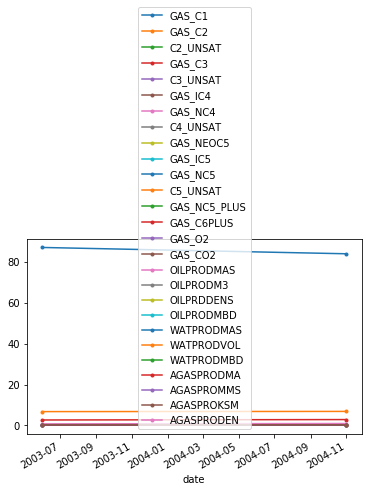

21/20a


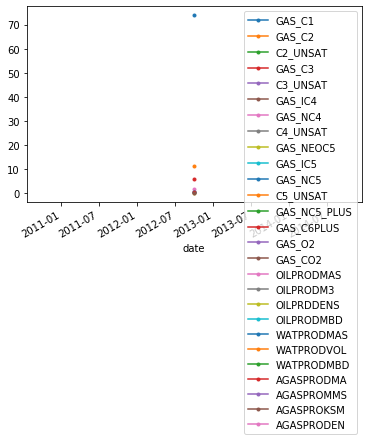

21/20b


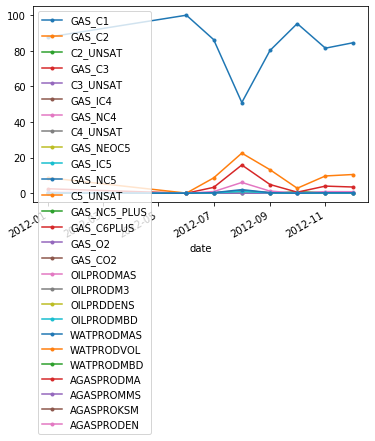

21/25


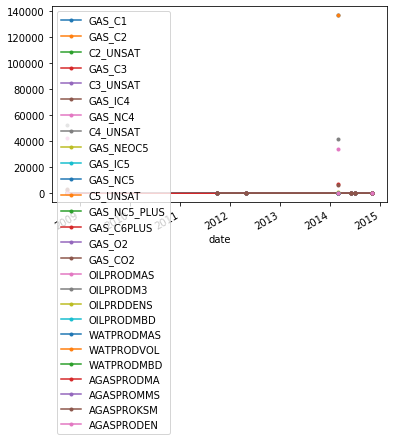

21/25a


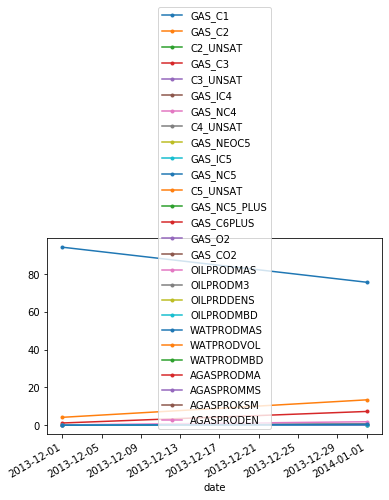

21/25b


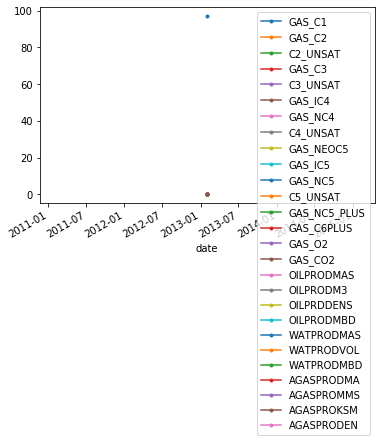

21/30b


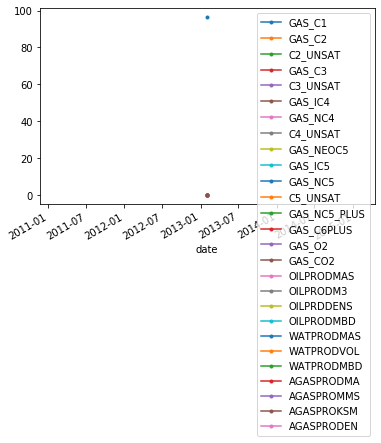

21/30d


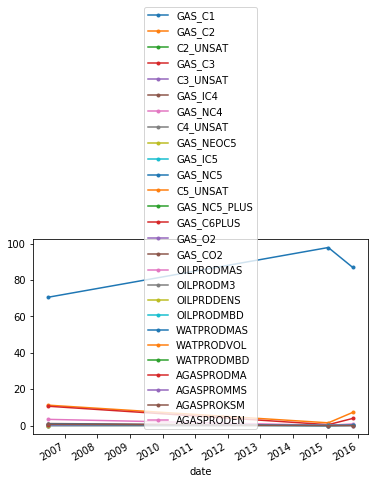

21/30f


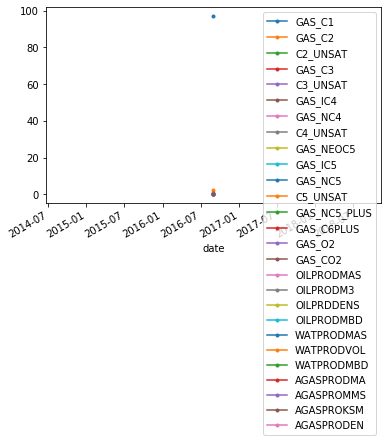

22/06a


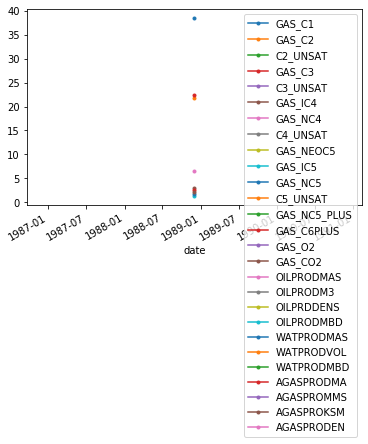

22/11


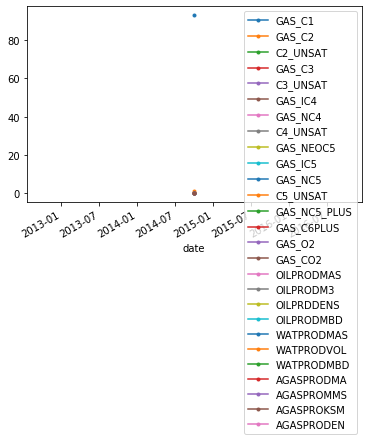

22/11a


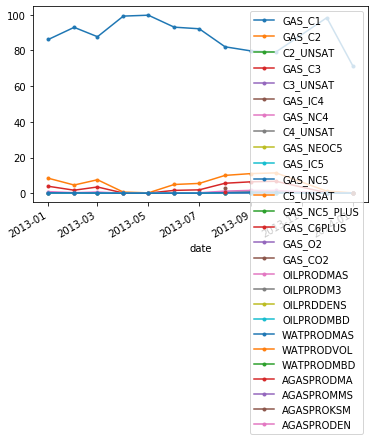

22/12a


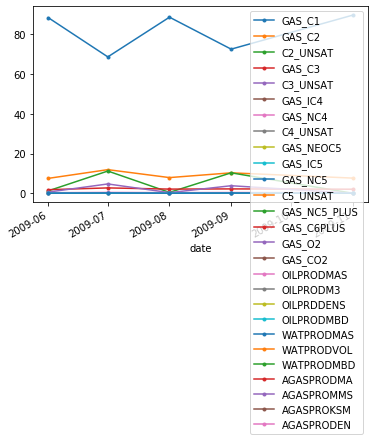

22/12c


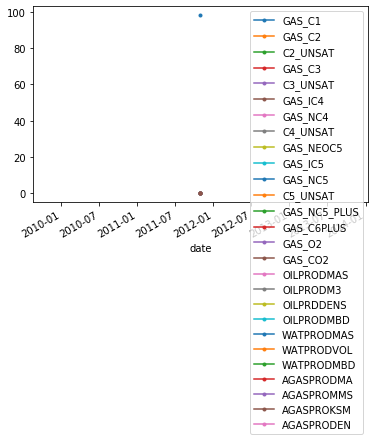

22/13a


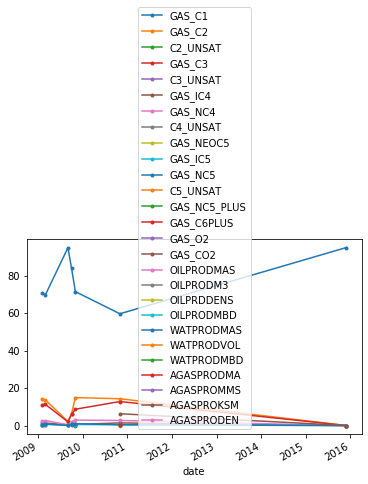

22/21


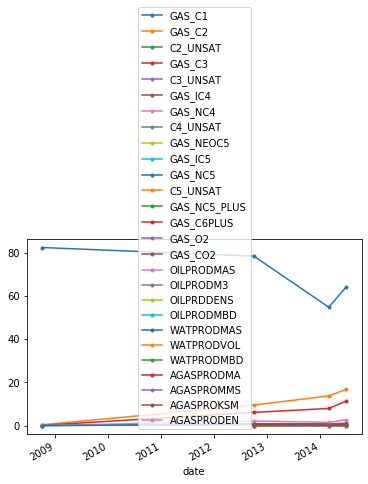

22/24d


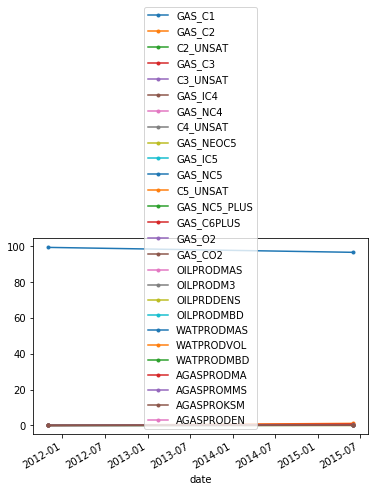

22/29


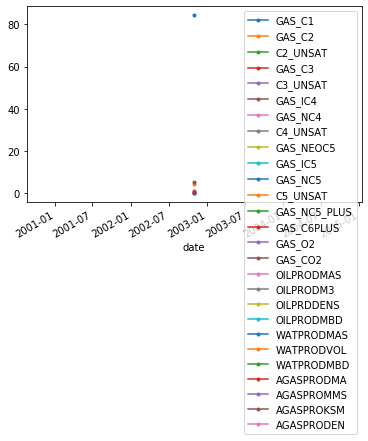

22/30a


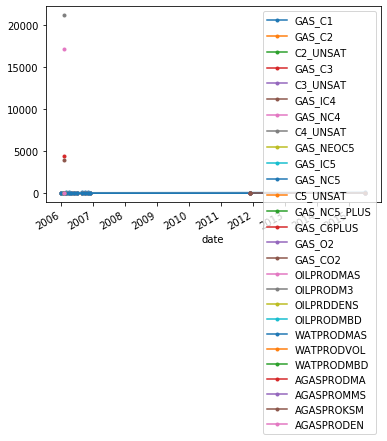

22/30b


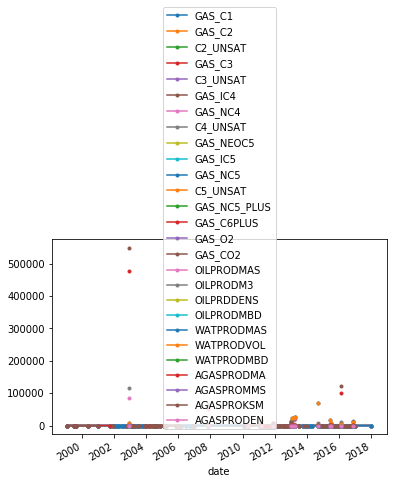

23/22a


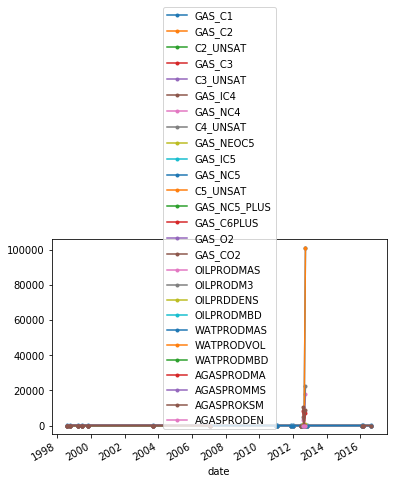

23/27


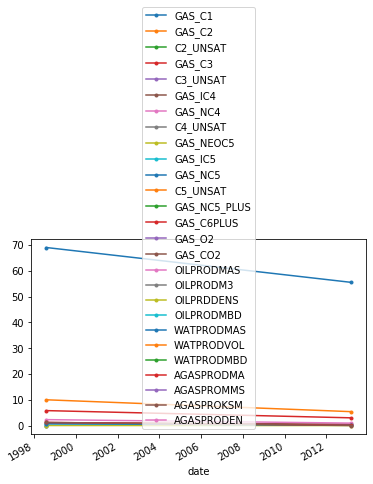

23/27a


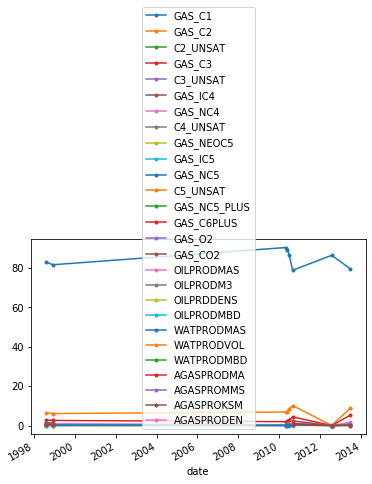

29/03a


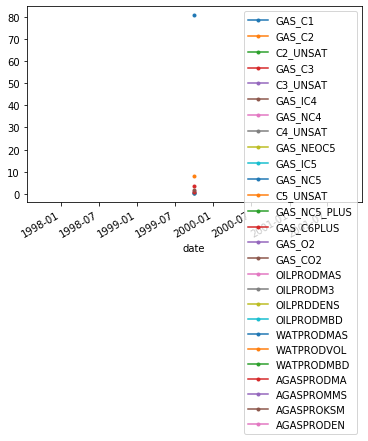

29/03c


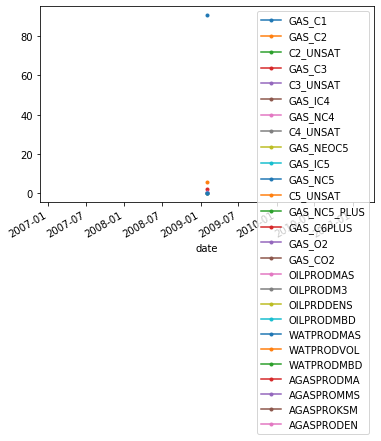

29/07a


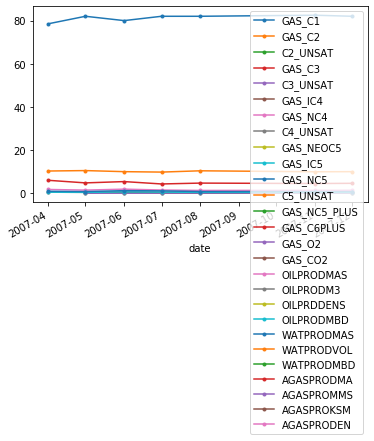

In [287]:
groups = df_master.groupby(['block']).groups
for key, values in tqdm(groups.items()):
    print(key)
    data = df_master.iloc[values]
    y_cols = gas_f + PROTO_TARGET_PROD_COLS
#     data_low = data.loc[data[y_cols] < 10.].dropna(how='all')
#     data_mid = data.loc[(data[y_cols] >= 10.) & (data[y_cols] < 1000.)].dropna(how='all')
#     data_high = data.loc[data[y_cols] >= 1000.].dropna(how='all')
#     for col in TARGET_COLS + PROTO_TARGET_PROD_COLS:
#         print(col, data[col].min(), data[col].max(), data[col].std(), data[col].median())
#     data_low = data[data[TARGET_COLS + PROTO_TARGET_PROD_COLS]
    data.plot(x='date', y=y_cols, style='.-')
    plt.show()

In [266]:
date_min_ceiled = pd.to_datetime(df_master['date'].min().strftime('%Y-%m'))
date_max_ceiled = pd.to_datetime(df_master['date'].max().strftime('%Y-%m'))
date_range = pd.DataFrame({'date': pd.date_range(date_min_ceiled - pd.DateOffset(1), date_max_ceiled, freq='M') + pd.DateOffset(1)})
date_min_ceiled, date_max_ceiled

(Timestamp('1988-12-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [267]:
date_range

,date
0,1988-12-01
1,1989-01-01
2,1989-02-01
3,1989-03-01
4,1989-04-01
5,1989-05-01
6,1989-06-01
7,1989-07-01
8,1989-08-01
9,1989-09-01


In [268]:
date_min_ceiled, date_max_ceiled

(Timestamp('1988-12-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [269]:
df_master['block'].unique()

array(['14/29a', '21/20a', '21/20b', '21/25', '21/25a', '21/25b',
       '21/30b', '21/30d', '21/30f', '22/06a', '22/11', '22/11a',
       '22/12a', '22/12c', '22/13a', '22/21', '22/24d', '22/29', '22/30a',
       '22/30b', '23/22a', '23/27', '23/27a', '29/03a', '29/03c',
       '29/07a'], dtype=object)

In [270]:
df_master.columns.tolist()

['block',
 'date',
 'GAS_C1',
 'GAS_C2',
 'C2_UNSAT',
 'GAS_C3',
 'C3_UNSAT',
 'GAS_IC4',
 'GAS_NC4',
 'C4_UNSAT',
 'GAS_NEOC5',
 'GAS_IC5',
 'GAS_NC5',
 'C5_UNSAT',
 'GAS_NC5_PLUS',
 'GAS_C6PLUS',
 'GAS_O2',
 'GAS_CO2',
 'OILPRODMAS',
 'OILPRODM3',
 'OILPRDDENS',
 'OILPRODMBD',
 'WATPRODMAS',
 'WATPRODVOL',
 'WATPRODMBD',
 'AGASPRODMA',
 'AGASPROMMS',
 'AGASPROKSM',
 'AGASPRODEN']

In [306]:
df_digital = pd.DataFrame()
df_digital_nan = pd.DataFrame()
for block in tqdm(df_master['block'].unique()):
    data_block = date_range.merge(df_master[df_master['block'] == block], on='date', how='left')
    df_digital_nan = df_digital_nan.append(data_block, ignore_index=True)
    data_block['block'] = data_block['block'].fillna(method='ffill').fillna(method='bfill')
    data_block[gas_f] = data_block[gas_f].fillna(method='ffill').fillna(method='bfill')
    data_block[PROTO_TARGET_PROD_COLS] = data_block[PROTO_TARGET_PROD_COLS].fillna(0)
    df_digital = df_digital.append(data_block, ignore_index=True)
df_digital.shape

(9100, 31)

/home/i.migal/.local/lib/python3.7/site-packages/pandas/plotting/_core.py:310: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


block
14/29a    AxesSubplot(0.125,0.125;0.775x0.755)
21/20a    AxesSubplot(0.125,0.125;0.775x0.755)
21/20b    AxesSubplot(0.125,0.125;0.775x0.755)
21/25     AxesSubplot(0.125,0.125;0.775x0.755)
21/25a    AxesSubplot(0.125,0.125;0.775x0.755)
21/25b    AxesSubplot(0.125,0.125;0.775x0.755)
21/30b    AxesSubplot(0.125,0.125;0.775x0.755)
21/30d    AxesSubplot(0.125,0.125;0.775x0.755)
21/30f    AxesSubplot(0.125,0.125;0.775x0.755)
22/06a    AxesSubplot(0.125,0.125;0.775x0.755)
22/11     AxesSubplot(0.125,0.125;0.775x0.755)
22/11a    AxesSubplot(0.125,0.125;0.775x0.755)
22/12a    AxesSubplot(0.125,0.125;0.775x0.755)
22/12c    AxesSubplot(0.125,0.125;0.775x0.755)
22/13a    AxesSubplot(0.125,0.125;0.775x0.755)
22/21     AxesSubplot(0.125,0.125;0.775x0.755)
22/24d    AxesSubplot(0.125,0.125;0.775x0.755)
22/29     AxesSubplot(0.125,0.125;0.775x0.755)
22/30a    AxesSubplot(0.125,0.125;0.775x0.755)
22/30b    AxesSubplot(0.125,0.125;0.775x0.755)
23/22a    AxesSubplot(0.125,0.125;0.775x0.755)
23/27  

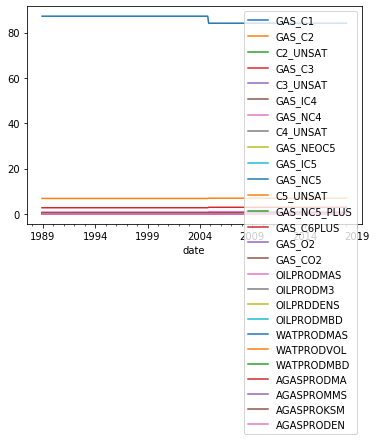

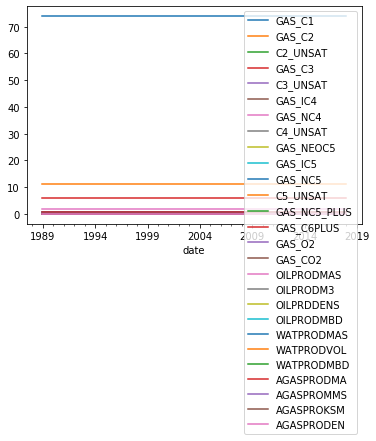

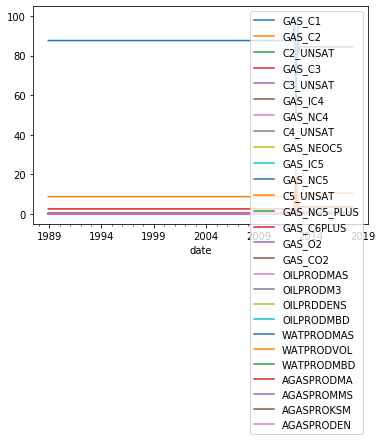

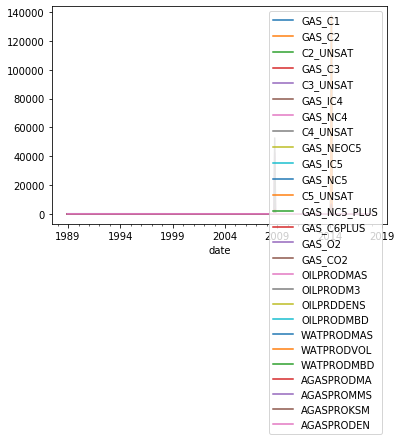

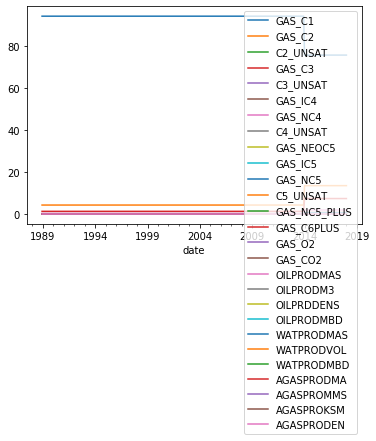

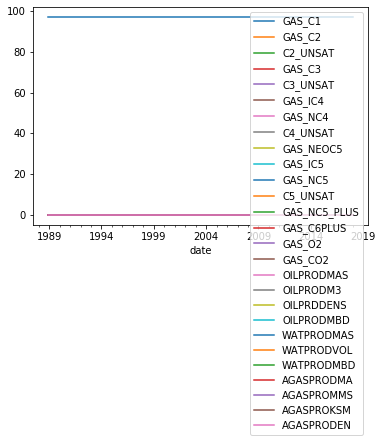

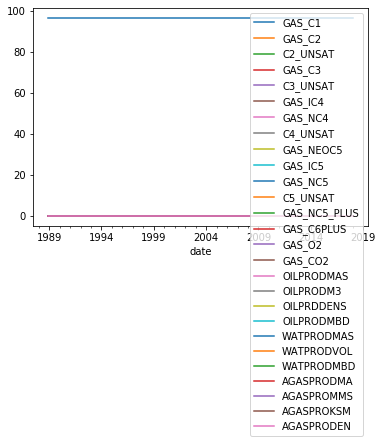

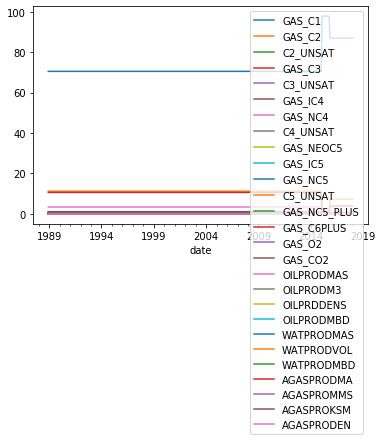

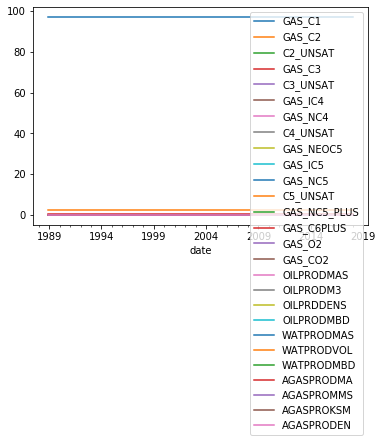

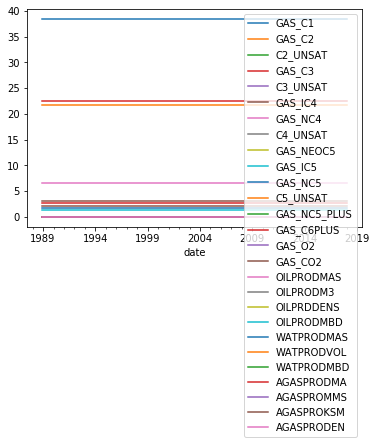

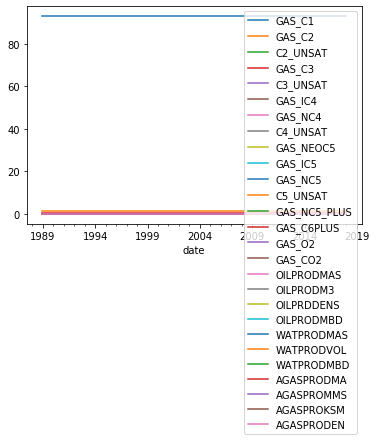

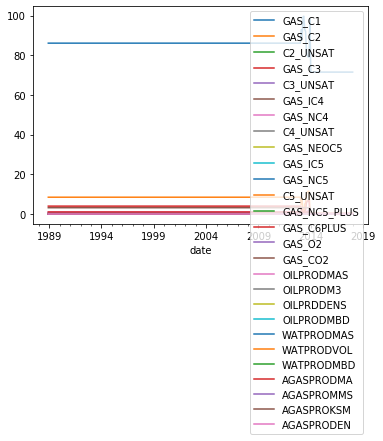

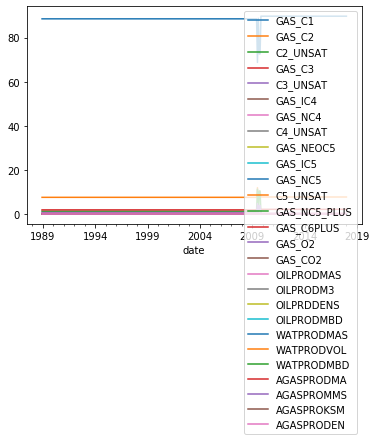

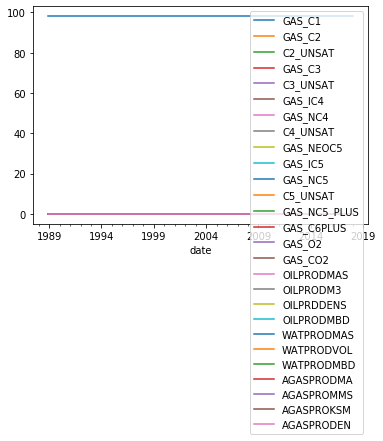

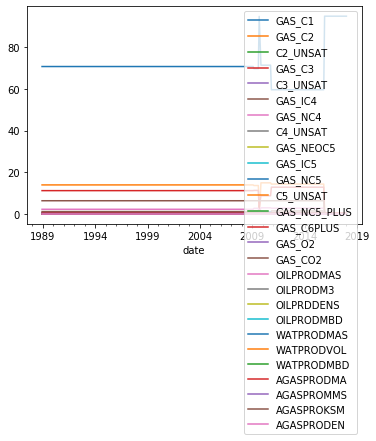

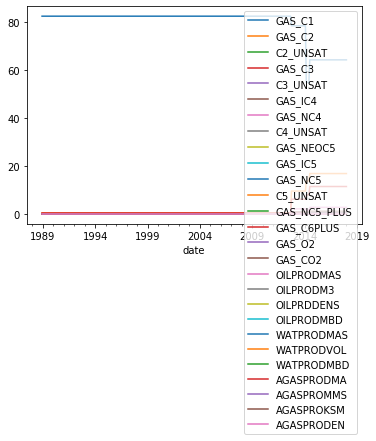

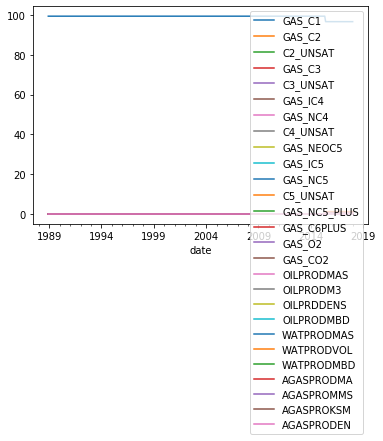

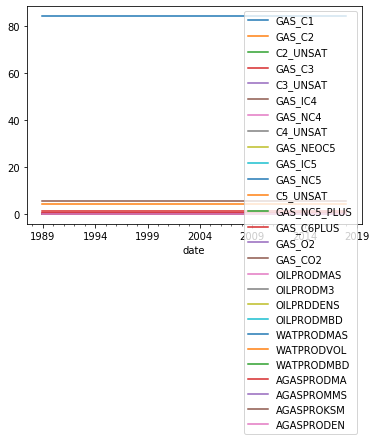

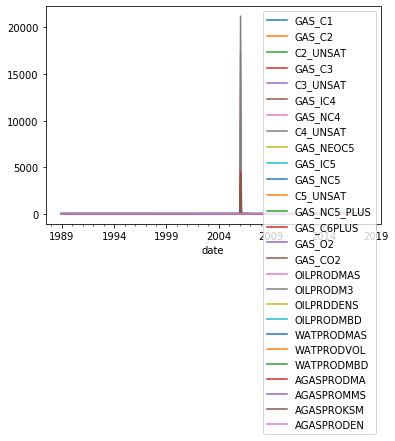

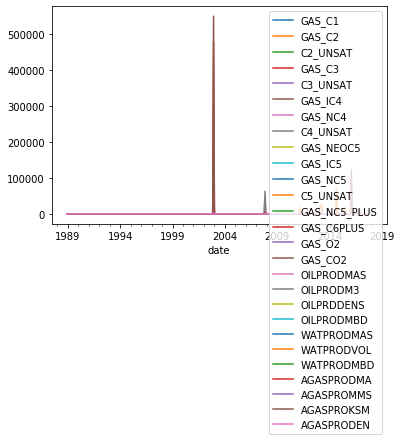

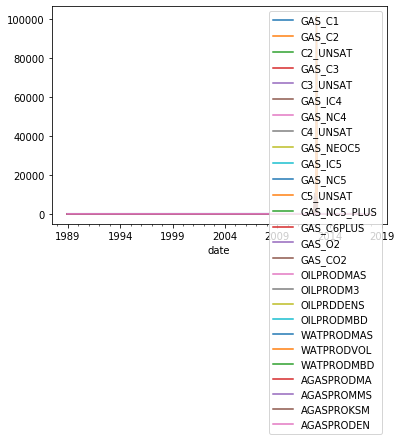

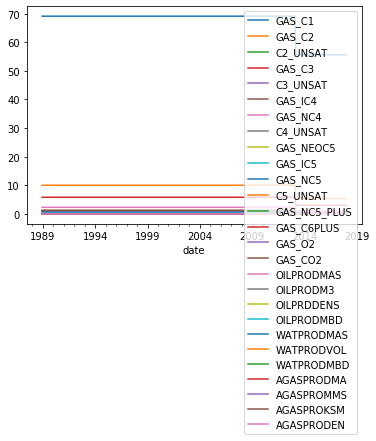

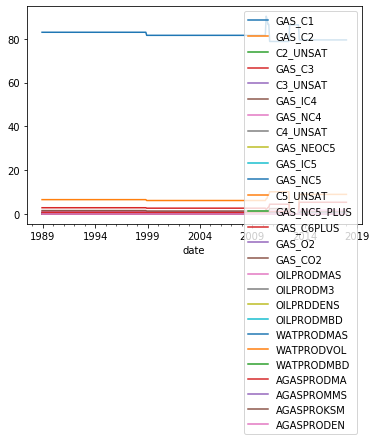

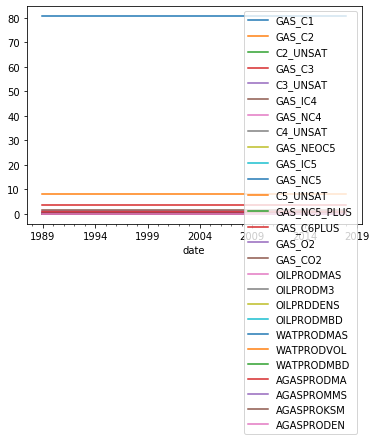

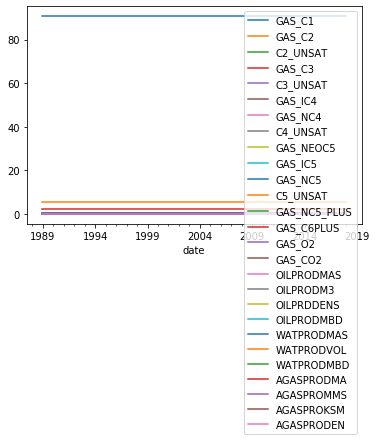

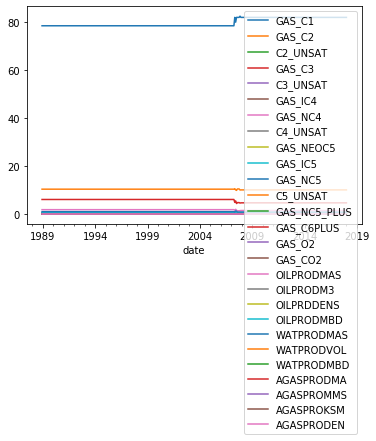

In [283]:
df_digital.groupby(['block']).plot(x='date')

In [307]:
df_digital_nan.to_csv('df_digital_nan.csv', index=False)
df_digital.to_csv('df_digital.csv', index=False)

In [282]:
df_digital

,date,block,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,GAS_NC4,C4_UNSAT,...,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
0,1988-12-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1989-01-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1989-02-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1989-03-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989-04-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1989-05-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1989-06-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1989-07-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1989-08-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1989-09-01,14/29a,87.2,6.8,NaN,2.7,NaN,0.38,0.79,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
gas_f

['GAS_C1',
 'GAS_C2',
 'C2_UNSAT',
 'GAS_C3',
 'C3_UNSAT',
 'GAS_IC4',
 'GAS_NC4',
 'C4_UNSAT',
 'GAS_NEOC5',
 'GAS_IC5',
 'GAS_NC5',
 'C5_UNSAT',
 'GAS_NC5_PLUS',
 'GAS_C6PLUS',
 'GAS_O2',
 'GAS_CO2']

In [276]:
data_block[PROTO_TARGET_PROD_COLS] = data_block[PROTO_TARGET_PROD_COLS].fillna(0)

In [234]:
data_block[gas_f].fillna('ffill').fillna('bfill')

KeyError: "['C2_UNSAT' 'C3_UNSAT' 'C4_UNSAT' 'GAS_NEOC5' 'C5_UNSAT' 'GAS_NC5_PLUS'\n 'GAS_C6PLUS' 'GAS_O2' 'GAS_CO2'] not in index"

In [230]:
data_block

,date,block,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5,OILPRODMAS,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
0,1988-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1989-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1989-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1989-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1989-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
data_block

,block,date,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5,OILPRODMAS,OILPRODM3,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN
215,29/07a,2007-04-01,78.5,10.30,6.0,0.475,1.75,0.485,0.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,29/07a,2007-05-01,82.0,10.50,4.8,0.420,1.45,0.415,0.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,29/07a,2007-06-01,80.0,10.00,5.4,0.530,1.90,0.610,1.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,29/07a,2007-07-01,82.0,9.80,4.3,0.410,1.50,0.530,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,29/07a,2007-08-01,82.0,10.40,4.7,0.370,1.30,0.415,0.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,29/07a,2007-11-01,82.5,9.95,4.5,0.385,1.35,0.415,0.755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,29/07a,2007-12-01,82.0,10.00,4.6,0.390,1.40,0.410,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


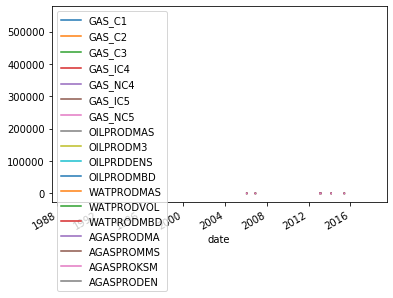

In [214]:
df_digital.plot(x='date')

In [170]:
data_block['date']

1670   2007-12-01
1671   2013-11-01
1672   2014-01-01
1673   2014-01-01
1674   2014-01-01
1675   2014-01-01
1676   2014-01-01
1677   2014-01-01
1678   2014-01-01
1679   2014-01-01
1680   2014-01-01
1681   2014-01-01
1682   2014-01-01
1683   2014-01-01
1684   2014-01-01
1685   2014-01-01
1686   2014-01-01
1687   2014-01-01
1688   2014-01-01
1689   2014-01-01
1690   2014-01-01
1691   2014-01-01
1692   2014-01-01
1693   2014-01-01
1694   2014-01-01
1695   2014-01-01
1696   2014-01-01
1697   2014-01-01
1698   2014-01-01
1699   2014-01-01
1700   2014-01-01
1701   2014-01-01
1702   2014-01-01
1703   2014-01-01
1704   2014-01-01
1705   2014-01-01
1706   2014-01-01
1707   2014-01-01
1708   2014-01-01
Name: date, dtype: datetime64[ns]

In [167]:
df_digital

,date,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,...,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN,block_dt_y
0,1988-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1989-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1989-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1989-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1989-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
buf[buf['date'] == data_block.loc[0, 'date']]

,date,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,...,OILPRDDENS,OILPRODMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,AGASPRODMA,AGASPROMMS,AGASPROKSM,AGASPRODEN,block_dt_y
174,2003-06-01,United Kingdom,013/23-01,13/23- 1,WELL,Duart,013/23,58.17926198,-1.460759073,World Geodetic System 1984,...,803.0,10.678809,169.0,169.0,0.034441,2871.4842,3.446972,3025.8,0.949,21/25_2008_10


In [151]:
data_block['date']

0   2003-06-01
Name: date, dtype: datetime64[ns]

In [129]:
date_range

,date
0,1988-12-01
1,1989-01-01
2,1989-02-01
3,1989-03-01
4,1989-04-01
5,1989-05-01
6,1989-06-01
7,1989-07-01
8,1989-08-01
9,1989-09-01


In [86]:
data_block['date']

1412   2013-01-01
1460   2013-01-01
1461   2013-01-01
1462   2013-01-01
1463   2013-01-01
1427   2013-02-01
1416   2013-03-01
1417   2013-03-01
1418   2013-03-01
1419   2013-03-01
1420   2013-03-01
1421   2013-03-01
1422   2013-03-01
1423   2013-03-01
1424   2013-03-01
1425   2013-03-01
1426   2013-03-01
1471   2013-03-01
1428   2013-04-01
1429   2013-04-01
1430   2013-04-01
1431   2013-04-01
1432   2013-04-01
1433   2013-04-01
1434   2013-04-01
1470   2013-05-01
1464   2013-06-01
1465   2013-06-01
1466   2013-06-01
1467   2013-06-01
          ...    
1406   2013-08-01
1407   2013-08-01
1408   2013-08-01
1435   2013-08-01
1449   2013-08-01
1450   2013-08-01
1451   2013-08-01
1452   2013-08-01
1453   2013-08-01
1454   2013-08-01
1455   2013-08-01
1456   2013-08-01
1457   2013-08-01
1458   2013-08-01
1459   2013-08-01
1440   2013-09-01
1441   2013-09-01
1442   2013-09-01
1443   2013-09-01
1444   2013-09-01
1445   2013-09-01
1446   2013-09-01
1447   2013-09-01
1448   2013-09-01
1436   201

In [53]:
pd.to_datetime(df_master['dt_month_ceil'].min().strftime('%Y-%m'))

Timestamp('1988-12-01 00:00:00')

In [ ]:
for block in tqdm(df_anal['block'].unique()):
    print(block)
    data = df_anal[df_anal['block'] == block]
    if len(data) > 10:
        df_block = df_anal[df_anal['block'] == block]
        df_block
        df_block.plot(x='date', y=PROTO_TARGET_PROD_COLS, style='.-')
        df_block.plot(x='date', y=TARGET_COLS, style='.-')
        plt.show()
    else:
        print('plot canceled: len < 10')

In [ ]:
from itertools import product
import seaborn as sns

combos_cols = list(product(TARGET_COLS, PROTO_TARGET_PROD_COLS))

corr = df_master[TARGET_COLS+ PROTO_TARGET_PROD_COLS].corr(method='spearman')


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
corr

In [ ]:
df_master.groupby(['block_x']).plot(x='dt_month_ceil', y=['AGASPRODMA'])

In [ ]:
df_master.columns.tolist()

In [ ]:
df_production.head().T

In [ ]:
col, df_gas_train[col].unique().tolist()

In [ ]:
for col in tqdm(coord_cols):
    print(col)
    try:
        df_gas_train[col] = df_gas_train[col].replace({'World Geodetic System 1984': float('nan')}).astype(float)
    except Exception as e:
        print(e)

In [ ]:
# Axes3D
# %matplotlib notebook
_3d = df_gas_train[['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT']].dropna()
x = np.array(_3d['WH_LAT'].values, dtype=float)
y = np.array(_3d['WH_LONG'].values, dtype=float)
z = np.array(_3d['SH_DEPTH_TOP_FT'].values, dtype=float)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


ax.plot_trisurf(x, y, z, linewidth=0.2, cmap='hot')
ax.scatter(x, y, z, c='g', s=10)
plt.show()

In [ ]:
# data formatting
for col in df_gas_train.columns:
    if 'DATE' in col:
        df_gas_train[col] = pd.to_datetime(df_gas_train[col])
df_gas_train.head().T

In [ ]:
# types check
for col in df_gas_train.columns:
    print(df_gas_train[col].dtype, col)

In [ ]:
def get_date_cols(df, prefix='DATE'):
    return [col for col in df.columns if prefix in col]

def get_cols_by_dtype(df, dtype=float):
    return [col for col in df.columns if df[col].dtype==dtype]

In [ ]:
# plots
date_cols = get_date_cols(df_gas_train)
float_cols = get_cols_by_dtype(df_gas_train)
groupby_cols = ['WH_LAT', 'WH_LONG']
groupby = df_gas_train.groupby(groupby_cols)
for date_col in date_cols:
#     for float_col in float_cols:
#         df_gas_train.plot(x=date_col, y=float_col)
#         plt.show()
    groupby[list(set(float_cols) - set(groupby_cols)) + [date_col]].plot(x=date_col)
    plt.show()

In [ ]:
df_gas_train.sort_values(['SH_CDATE'], inplace=True)

In [ ]:
# date analysis
for date_col in date_cols:
    print(date_col, df_gas_train[date_col].min(), df_gas_train[date_col].max())
    print(df_gas_train[date_col].diff().mean(), df_gas_train[date_col].diff().median(), df_gas_train[date_col].diff().std())

In [ ]:
df_gas_train['SH_FORM'] = df_gas_train['SH_FORM'].replace({'VALHALL': 'VALLHALL',
                                                           'VALHAL': 'VALLHALL',
                                                           'VALLHAL': 'VALLHALL',
                                                           'VALHALL CLAY': 'VALLHALL CLAY'})

# make data for plot 2D

In [ ]:
groupby_cond = ['WELL_NAME', 'SH_FORM', pd.Grouper(key='SH_CDATE', freq='1D')]
get_cols = ['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT', *TARGET_COLS]
groupby = df_gas_train.groupby(groupby_cond)
df_for_2d_plot = df_gas_train.groupby(groupby_cond)[get_cols].median().reset_index()
df_for_2d_plot.head()

In [ ]:
df_for_2d_plot['SH_FORM'].unique().tolist()

In [ ]:
len(df_for_2d_plot['SH_FORM'].unique().tolist())

In [ ]:
df_for_2d_plot.loc[df_for_2d_plot['SH_FORM'] == 'VALLHALL']

In [ ]:
len(df_for_2d_plot['WELL_NAME'].unique().tolist())

In [ ]:
df_for_2d_plot.groupby(['SH_FORM', pd.Grouper(key='SH_CDATE', freq='1D')]).groups

In [ ]:
import json_tricks as json
d_coords = {}
for form in df_gas_train['SH_FORM'].unique():
    try:
        mask = df_gas_train['SH_FORM'] == form
        print(form)
        print(df_gas_train.loc[mask, ['WH_LAT', 'WH_LONG']]['WH_LAT'].unique())
        print(df_gas_train.loc[mask, ['WH_LAT', 'WH_LONG']]['WH_LONG'].unique())
        print('WELLS')
        coords = list(df_gas_train.loc[mask].groupby(['WH_LAT', 'WH_LONG']).groups.keys())
        lat = [el[0] for el in coords if el[0] != float('nan')]
        long = [el[1] for el in coords if el[1] != float('nan')]
        d_coords[str(form)] =  coords
        print(coords)
    except Exception as e:
        print(e)
json.dumps(d_coords)

In [ ]:
d_coords

In [ ]:
df_coords

In [ ]:
lat

In [ ]:
mask = df_gas_train['SH_FORM'] == 'HOD'
df_gas_train.loc[mask, ['WH_LAT', 'WH_LONG']]['WH_LAT'].unique()

In [ ]:
df_gas_train.loc[mask, ['WH_LAT', 'WH_LONG']]['WH_LONG'].unique()

In [ ]:
df_gas_train.loc[mask].groupby(['WH_LAT', 'WH_LONG', 'SH_DEPTH_TOP_FT', 'SH_DEPTH_BOT_FT']).plot(x='SH_CDATE', y=TARGET_COLS, style='.-')

In [ ]:
stats_gas_point = {}
for key, value in tqdm(df_for_2d_plot.groupby(['SH_FORM']).groups.items()):
    data = df_for_2d_plot.loc[value]
    print(key, len(data))
    stats_gas_point[key] = len(data)
    data[['WH_LAT', 'WH_LONG']].plot(x='WH_LAT', y='WH_LONG', kind='scatter')
    plt.show()

In [ ]:
stats_gas_point